# Multivariate Analysis with Seaborn

Multivariate visualizations are an expansion of bivariate analysis, where we add another variable (or variables). Often, adding the third variable helps us to find some important pattern or information that we couldn´t have observed before. 

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace = True)

In [4]:
# Take a look at first 5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


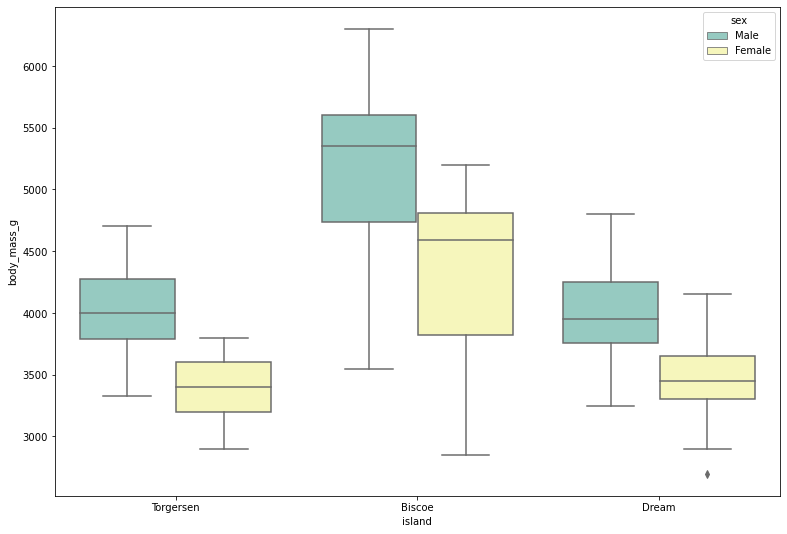

In [10]:
# A boxplot
plt.subplots(figsize = (13,9))
sns.boxplot(data = penguins, x = 'island', 
            y = 'body_mass_g', 
            hue = 'sex', 
            palette = 'Set3');

The above boxplot shows the distribution of penguin´s body mass based on the gender of penguins and an island they inhabit.

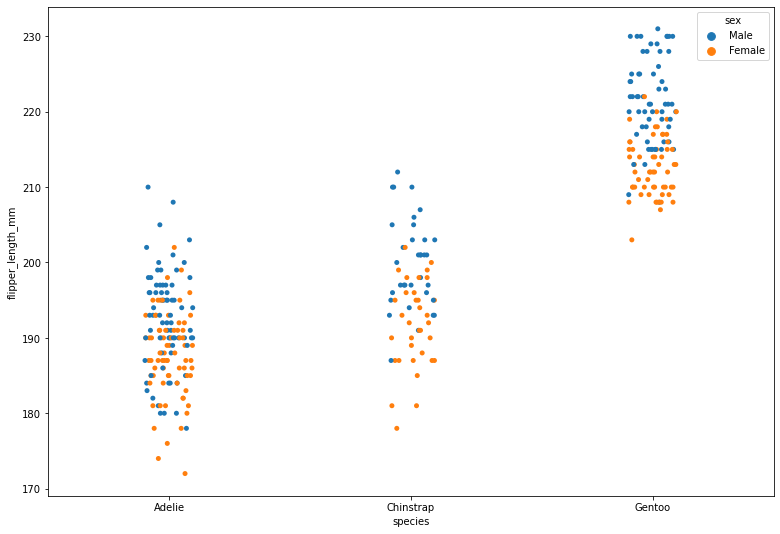

In [12]:
# A stripplot
plt.subplots(figsize = (13,9))
sns.stripplot(data = penguins, x = 'species', 
              y = 'flipper_length_mm', 
              hue ='sex');

Here we can observe the flipper length distribution based on species and the gender of penguins. We can immediately see more of differences or similarities between them thanks to adding a third variable.

# Encoding the third variable 

There are 3 ways how to encode the third variable:

- color
- 

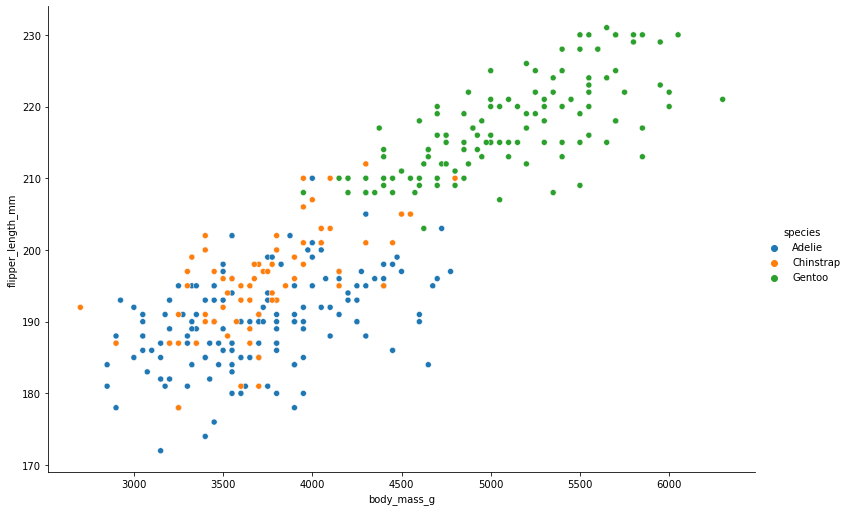

In [15]:
# A scatterplot
sns.relplot(data = penguins, x = 'body_mass_g', 
            y = 'flipper_length_mm', 
            hue = 'species',
            height = 7,
            aspect = 1.5);

Often, a relationship between variables become more clear when we add variable as 'species' to a simple relplot.

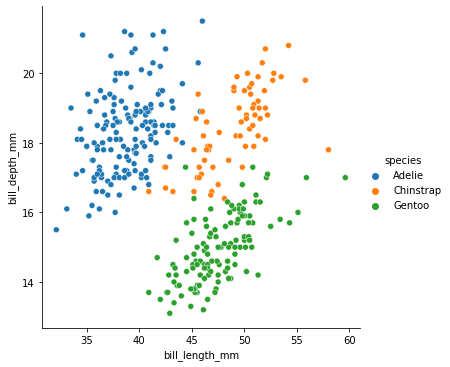

In [9]:
#TASK 
sns.relplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species');

##  FacetGrid

intro

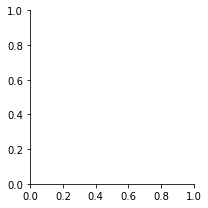

In [41]:
sns.FacetGrid(penguins)

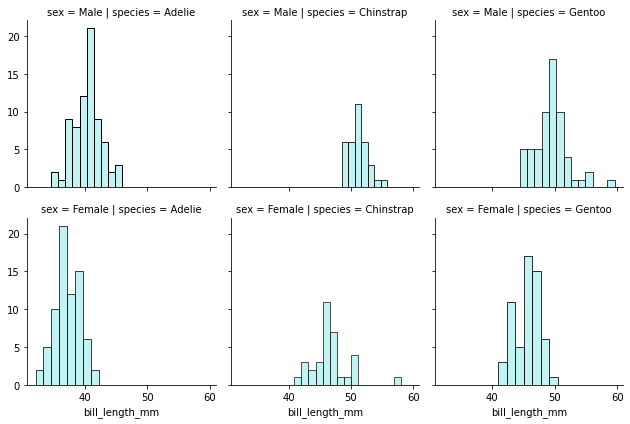

In [72]:
g = sns.FacetGrid(penguins, col = 'species', row = 'sex')
g.map(sns.histplot, 'bill_length_mm', color = 'paleturquoise')

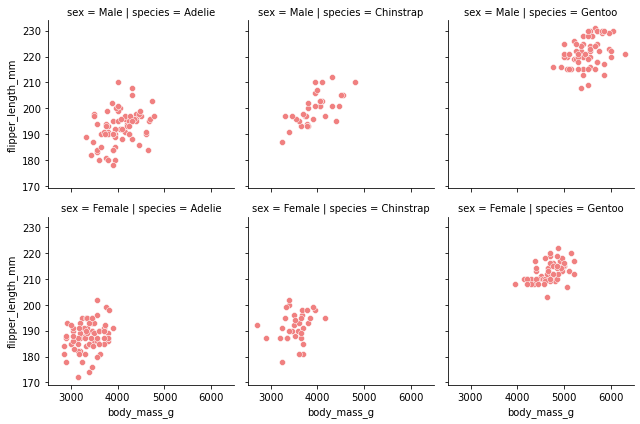

In [82]:
# Defining colors and markers of gender
c_m = {'color':['lightcoral','royalblue'],
       'markers':['x','o']}

facetgrid = sns.FacetGrid(penguins, col = 'species', row = 'sex', hue_kws = c_m)
facetgrid.map(sns.scatterplot, 'body_mass_g', 'flipper_length_mm');

**change colors and markers**

## PairGrid

In [68]:
palette = ['cornflowerblue','lightgreen','gold']

In [69]:
sns.set_palette(sns.color_palette(palette))

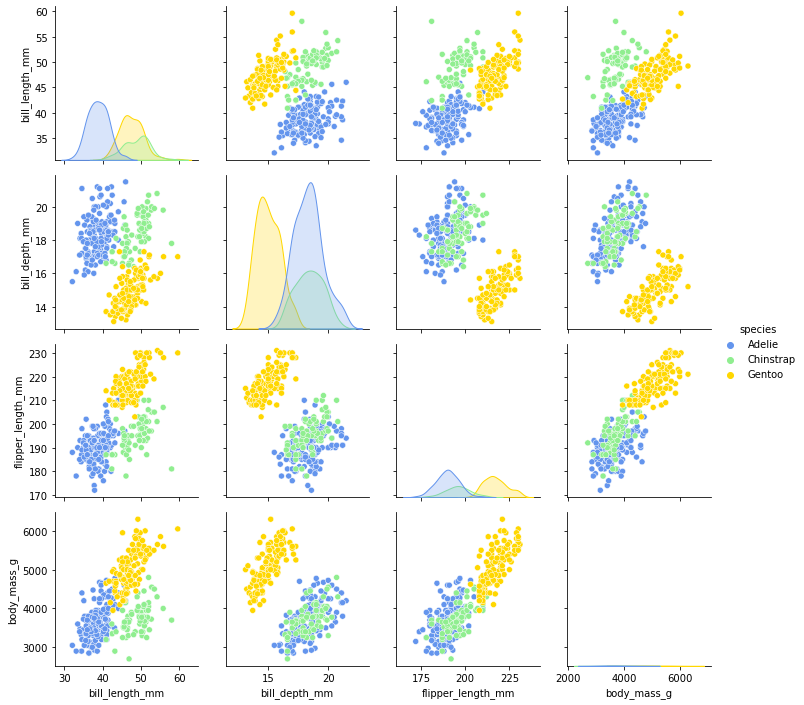

In [70]:
g_grid = sns.PairGrid(penguins, hue = 'species')
g_grid.map_diag(sns.kdeplot, fill = True)
g_grid.map_offdiag(sns.scatterplot)
g_grid.add_legend()